In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

interfence_types = ['some-memcached', 'ibench-cpu', 'ibench-l1i', 'ibench-l1d', 'ibench-l2', 'ibench-llc', 'ibench-membw']
label_map = {key: key for key in interfence_types if key != 'some-memcached'}
label_map['some-memcached'] = 'no-interference'

In [2]:
def aggregate_metrics(df):
    means = df.groupby('target').agg({'QPS': 'mean', 'p95': 'mean'}).sort_values('QPS')
    errs = df.groupby('target').agg({'QPS': 'std', 'p95': 'std'}).loc[means.index]
    return means, errs

def create_figure(df_list, xlim=(0,55000), ylim=(0,10), use_error_bars=True):
    fig = plt.figure(figsize=(8, 6))
    for interference_type in interfence_types:
        means, errs = aggregate_metrics(df_list[interference_type])
        if use_error_bars:
            plt.errorbar(means['QPS'], means['p95']/1000, xerr=errs['QPS'],  yerr=errs['p95']/1000, fmt='--o', markersize='4', elinewidth=0.5, capsize=1, label=label_map[interference_type])   
        else:
            plt.plot(means['QPS'], means['p95']/1000, '--o', markersize='4', label=label_map[interference_type])
    plt.xlabel('QPS')
    plt.ylabel('$95^{th}$ Percentile Latency (ms)')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.title('QPS vs Latency (3 Run Average)')
    plt.legend()
    plt.tight_layout()
    return fig

In [3]:
result_dfs = {}
for interference_type in interfence_types:
    file_path = f'results/{interference_type}.csv'
    result_dfs[interference_type] = pd.read_csv(file_path)

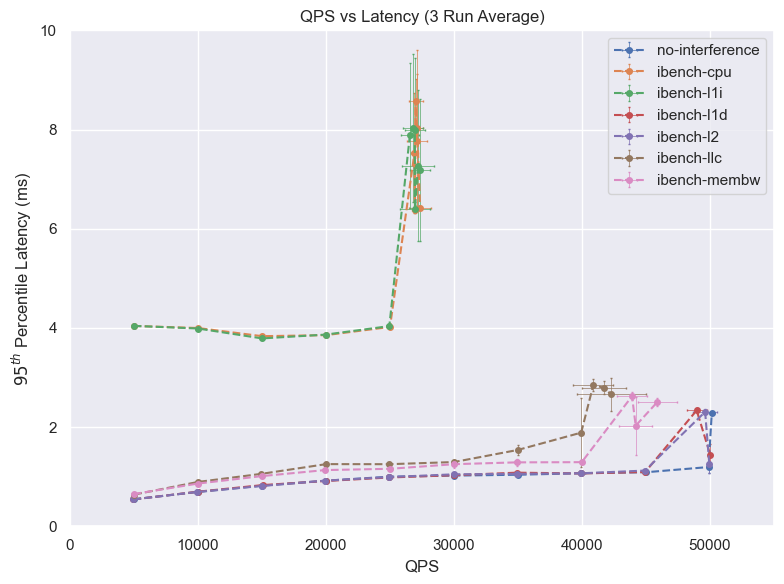

In [4]:
fig = create_figure(result_dfs)
fig.savefig('qps_vs_latency.png', dpi=300)

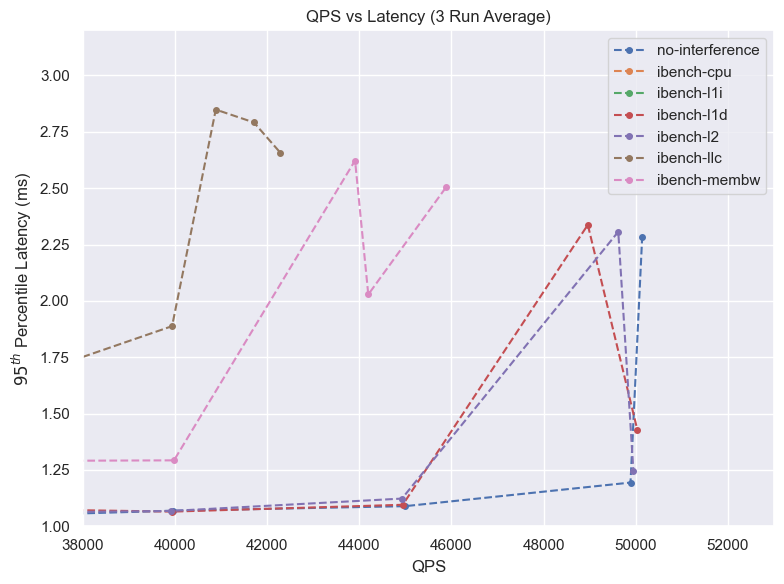

In [5]:
fig = create_figure(result_dfs, xlim=(38000,53000), ylim=(1,3.2), use_error_bars=False)
fig.savefig('qps_vs_latency_zoomed1.png', dpi=300)

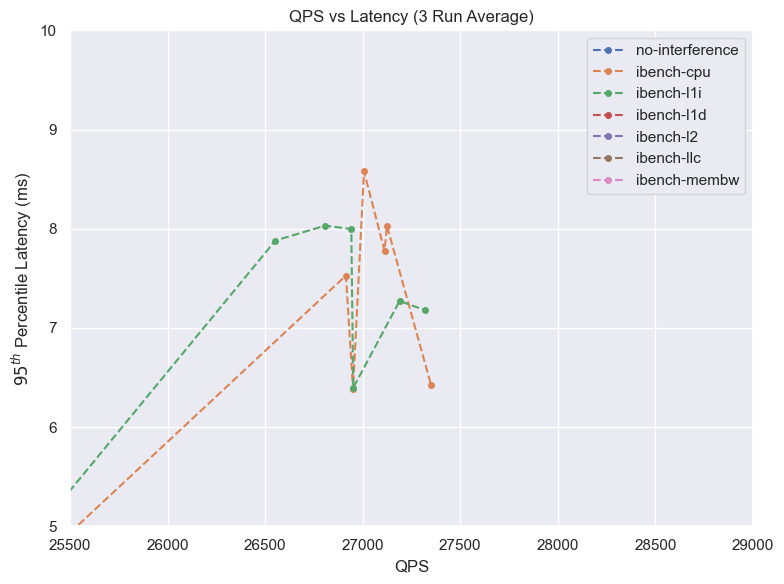

In [6]:
fig = create_figure(result_dfs, xlim=(25500,29000), ylim=(5, 10), use_error_bars=False)
fig.savefig('qps_vs_latency_zoomed2.png', dpi=300)